In [1]:
"""
The dataset did not have column names when downloaded. In order to load and process the data, I manually added the correct column names 
based on the dataset's documentation.

"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset (using the correct delimiter)
df = pd.read_csv(r"D:\housing.csv", delimiter="\s+",header=None)

# Define column names based on the dataset description
df.columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
    "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

df.info()

print(df.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\wangf\AppData\Local\Temp\ipykernel_42352\2989718568.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(r"D:\housing.csv", delimiter="\s+",header=None)


In [3]:
# Handle missing values:
num_columns = df.select_dtypes(include=[np.number]).columns
for col in num_columns:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

C:\Users\wangf\AppData\Local\Temp\ipykernel_42352\2208651712.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median, inplace=True)


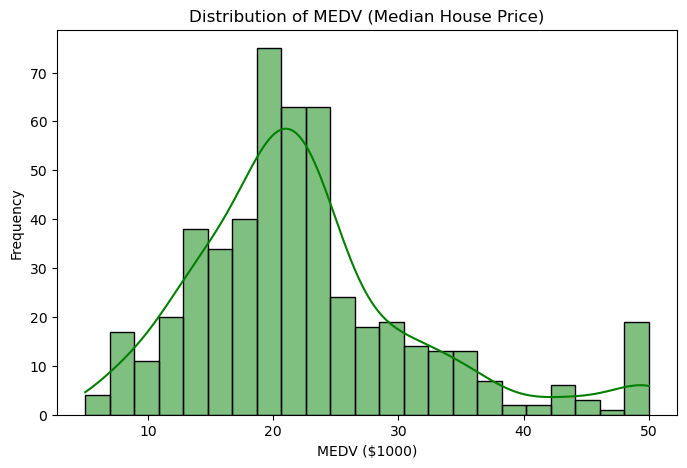

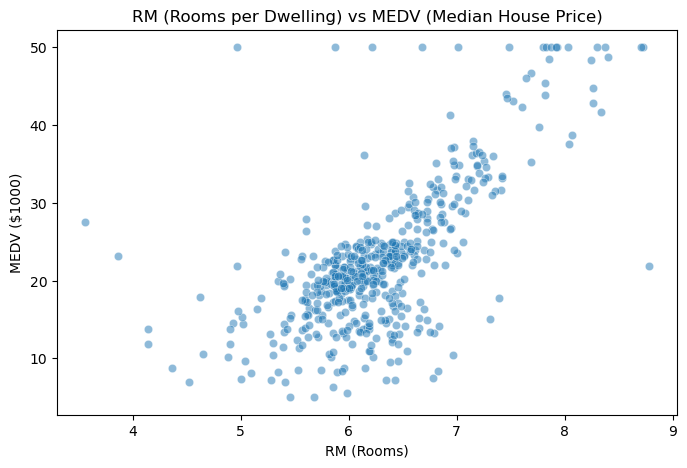

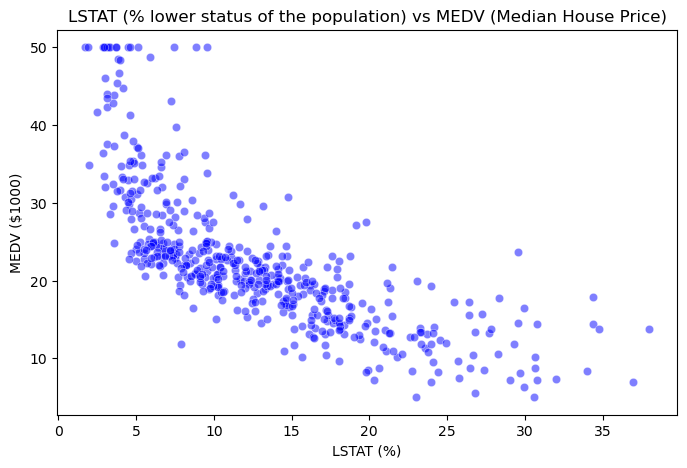

In [4]:
# Visualize the distribution of the target variable (MEDV) 
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="MEDV", kde=True, color="green")
plt.title("Distribution of MEDV (Median House Price)")
plt.xlabel("MEDV ($1000)")
plt.ylabel("Frequency")
plt.show()

# Visualize the relationship between RM and MEDV
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="RM", y="MEDV", alpha=0.5)
plt.title("RM (Rooms per Dwelling) vs MEDV (Median House Price)")
plt.xlabel("RM (Rooms)")
plt.ylabel("MEDV ($1000)")
plt.show()

# Visualize the relationship between LSTAT and MEDV
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="LSTAT", y="MEDV", alpha=0.5, color="blue")
plt.title("LSTAT (% lower status of the population) vs MEDV (Median House Price)")
plt.xlabel("LSTAT (%)")
plt.ylabel("MEDV ($1000)")
plt.show()

In [5]:
# Q2
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
# Split dataset into features and target variable
X = df.drop(columns=["MEDV"])  
y = df["MEDV"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
linear = LinearRegression()
linear.fit(X_train, y_train)

# Train Decision Tree Regressor model
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

NameError: name 'LinearRegression' is not defined

In [ ]:
# Predict on the test set
y_predict_linear = linear.predict(X_test)
y_predict_tree = tree.predict(X_test)

# Evaluate models using MAE and RMSE
mae_linear = mean_absolute_error(y_test, y_predict_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_predict_linear))

mae_tree = mean_absolute_error(y_test, y_predict_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_predict_tree))

print("\nResults:")
print(f"Linear Regression_MAE: {mae_linear:.2f}, RMSE: {rmse_linear:.2f}")
print(f"Decision Tree_MAE: {mae_tree:.2f}, RMSE: {rmse_tree:.2f}")

In [ ]:
plt.figure(figsize=(12,5))

# Linear Regression
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_predict_linear, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="green", linestyle="-")
plt.xlabel("Actual Prices (MEDV)")
plt.ylabel("Predicted Prices (MEDV)")
plt.title("Linear Regression: Actual vs Predicted")

# Decision Tree Plot
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_predict_tree, color="green", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="blue", linestyle="-")
plt.xlabel("Actual Prices (MEDV)")
plt.ylabel("Predicted Prices (MEDV)")
plt.title("Decision Tree: Actual vs Predicted")

plt.tight_layout()
plt.show()

In [ ]:
# Q3
# Import libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data into features (X) and target (y)
X = df.drop(columns=["MEDV"])  # Features
y = df["MEDV"]  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
baseline_model = DecisionTreeRegressor(random_state=42)
baseline_model.fit(X_train, y_train)
y_predict_baseline = baseline_model.predict(X_test)

# Evaluate model
mae_baseline = mean_absolute_error(y_test, y_predict_baseline)
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_predict_baseline))

print(f"\nBaseline Decision Tree - MAE: {mae_baseline:.2f}, RMSE: {rmse_baseline:.2f}")

In [ ]:
# Cross-Validation
cv_scores = cross_val_score(DecisionTreeRegressor(random_state=42), X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
print("\nScores:", -cv_scores)
print("Average CV MAE:", -cv_scores.mean())

param_grid = {
    "max_depth": [3, 5, 10, None],  
    "min_samples_split": [2, 5, 10]  
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("\nBest hyperparameters:", grid_search.best_params_)

# Train the model with optimal parameters
best_tree_model = grid_search.best_estimator_
y_predict_best = best_tree_model.predict(X_test)

mae_best = mean_absolute_error(y_test, y_predict_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_predict_best))

print(f"\nOptimized Decision Tree_MAE: {mae_best:.2f}, RMSE: {rmse_best:.2f}")


In [ ]:
# Compare
print("\nComparison:")
print(f"Baseline Model_MAE: {mae_baseline:.2f}, RMSE: {rmse_baseline:.2f}")
print(f"Optimized Model_MAE: {mae_best:.2f}, RMSE: {rmse_best:.2f}")

plt.figure(figsize=(12,5))

# Baseline Model
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_predict_baseline, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="green", linestyle="-")
plt.xlabel("Actual Prices (MEDV)")
plt.ylabel("Predicted Prices (MEDV)")
plt.title("Baseline Model: Actual vs Predicted")

# Optimized Model
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_predict_best, color="green", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="blue", linestyle="-")
plt.xlabel("Actual Prices (MEDV)")
plt.ylabel("Predicted Prices (MEDV)")
plt.title("Optimized Model: Actual vs Predicted")

plt.tight_layout()
plt.show()